# 비정상 절차서 19-02 : 가압기 안전밸브(BB-PSV008/009/010) 고장

경보 및 증상

자동 동작사항

긴급 조치사항

후속 조치사항

## 1.0 데이터 처리

In [1]:
import pickle
import matplotlib.pyplot as plt
from collections import deque
with open('D:/1.All_python_project/New_CNS_db/ab19_02_17_(348).pkl', 'rb') as f:
    db = pickle.load(f)

## 2.0 경보 및 증상

### 2.1 가압기 안전밸브 출구 고온 경보(주위온도＋10℃ : JP006)

관련 경보 확인불가.

### 2.2 가압기 안전밸브 출구온도 기록계 지시치 증가(BB-TR465 : JP005)

계치시 변수 확인불가

### 2.3 음향감시계기 주의 및 경보(주의 0.062Vrms, 경보 0.125Vrms : JP015)

관련 경보 확인불가.

### 2.4 가압기 보조전열기 지시등 켜짐 및 경보(155.4㎏/㎠ : JP006)

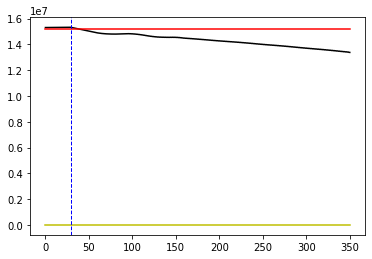

In [2]:
# KLAMPO312 : ALARM: PRZ PRESS LOW BACK-UP HEATER ON(153.6 KG/CM2) 
# PPRZN : 가압기 압력
# CQPRZB : 가압기 보조전열기 켜짐 SETPOINT
# KBHON : 보조전열기 STATE
plt.plot(db['PPRZN'], color='k')
plt.plot(db['CQPRZB'], color='r')
plt.plot(db['KBHON'], color='y')
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [3]:
heater_state = []
for i in range(len(db)):
    if i > 29:
        if db['PPRZN'][i] < db['CQPRZB'][i] and db['KBHON'][i]:
            heater_state.append(i+1)
if len(heater_state) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'최초 가압기 보조전열기 지시등 켜짐 및 경보 시간 : {heater_state[0]}초')

최초 가압기 보조전열기 지시등 켜짐 및 경보 시간 : 38초


### 2.5 가압기 저압경보(153.7㎏/㎠ : JP006)

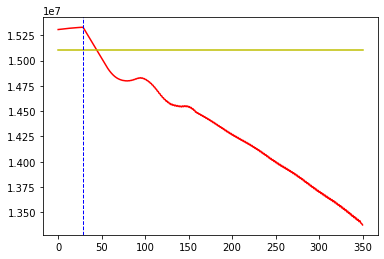

In [4]:
# KLAMPO308 : ALARM: PRZ PRESS LOW ALERT(153.6 KG/CM2) 
# PPRZ : 가압기 압력
# CPPRZL : PRZ PRESS LOW ALERT
plt.plot(db['PPRZ'], color='r')
plt.plot(db['CPPRZL'], color='y')
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [5]:
pzr_press = []
for i in range(len(db)):
    if i > 29:
        if db['PPRZ'][i] < db['CPPRZL'][i]:
            pzr_press.append(i+1)
if len(pzr_press) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'최초 가압기 저압력경보 시간 : {pzr_press[0]}초')

최초 가압기 저압력경보 시간 : 46초


### 2.6 가압기 압력방출밸브(PORV) 차단 경보(153.7㎏/㎠ : JP004)

### 2.7 가압기 압력방출탱크(PRT) 고압력 경보(0.6㎏/㎠ : JP006)

### 2.8 가압기 압력방출탱크(PRT) 고온 경보(45℃ : JP006)

### 2.9 가압기 압력방출탱크(PRT) 고수위 경보(85% : JP006)

### 2.10 가압기 수위 변화

※ 참고사항 :  가압기 수위는 증가하는 것처럼 보일 수도 있다.

### 2.11 충전유량 증가(BG-FI122A : JP001)

### 2.12 체적제어탱크 수위감소 및 원자로보충수 보충횟수 증가